In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string

from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle
from sklearn.metrics import roc_curve, auc
from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Cyborg\Anaconda3\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
df=pd.read_csv(r"E:\quora insincere  data\train.csv")

In [3]:
df.columns

Index(['qid', 'question_text', 'target'], dtype='object')

In [4]:
df["num_words"] = df["question_text"].apply(lambda x: len(str(x).split()))
df["num_words"] = df["question_text"].apply(lambda x: len(str(x).split()))
df["num_unique_words"] = df["question_text"].apply(lambda x: len(set(str(x).split())))
eng_stopwords = set(stopwords.words("english"))
df["num_stopwords"] = df["question_text"].apply(lambda x: len([w for w in str(x).lower().split() if
w in eng_stopwords]))

In [5]:
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [6]:
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [7]:
from tqdm import tqdm
from bs4 import BeautifulSoup
preprocessed_reviews = []
# tqdm is for printing the status bar
for sentance in tqdm(df['question_text'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    # https://gist.github.com/sebleier/554280
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_reviews.append(sentance.strip())

100%|██████████████████████████████████████████████████████████████████████| 1306122/1306122 [06:18<00:00, 3451.97it/s]


In [8]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import tree

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_curve, auc

### BOW

### Logistic Regression

In [11]:
parametersx=[{'C': [10**-4, 10**-2,0.75, 0.81, 1, 5, 10, 20, 50, 10**2, 10**4]}]
clf = GridSearchCV(LogisticRegression(penalty='l1'), parametersx, cv=4, scoring='roc_auc', )
clf.fit(X_train_bow, y_train)
cv_error=clf.cv_results_['mean_test_score']
train_error=clf.cv_results_['mean_train_score']
pred=clf.predict(X_train_bow)
score=roc_auc_score(y_train, pred)
c_value=clf.best_params_['C']
# depth=clf.best_params_['max_depth']
print("best estimator: ", clf.best_estimator_)
print("Train Score: ", clf.score(X_train_bow, y_train))
print("Test Score: ", clf.score(X_test_bow, y_test))

best estimator:  LogisticRegression(C=0.75, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Train Score:  0.958247303020083
Test Score:  0.94582438455984


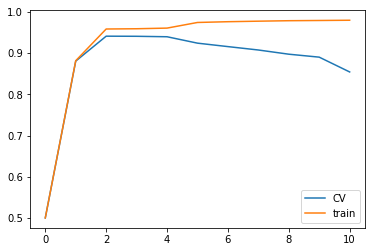

In [12]:
plt.plot(cv_error, label='CV')
plt.plot(train_error, label='train')
plt.legend()
plt.show()

The best score for AUC is equal to:  0.945825551698082
The best score for AUC is equal to:  0.9582469732099319
ROC SCORE ON BEST HYPER-PARAMETERS:  0.7167828352115645


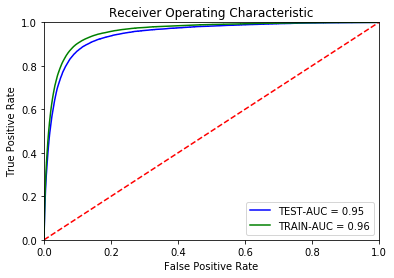

In [13]:
lr = LogisticRegression(C=c_value, penalty='l1')
lr.fit(X_train_bow, y_train)
pred1=lr.predict_proba(X_test_bow)[:,1]
pred2=lr.predict_proba(X_train_bow)[:,1]


print('The best score for AUC is equal to: ', roc_auc_score(y_test, pred1))
print('The best score for AUC is equal to: ', roc_auc_score(y_train, pred2))

score1=roc_auc_score(y_test, pred1)
score2=roc_auc_score(y_train, pred2)
cm = confusion_matrix(y_test, pred1.round())


print('ROC SCORE ON BEST HYPER-PARAMETERS: ', score)
fpr1, tpr1, threshold = roc_curve(y_test, pred1)
fpr2, tpr2, threshold = roc_curve(y_train, pred2)
roc_auc1 = auc(fpr1, tpr1)
roc_auc2 = auc(fpr2, tpr2)
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'b', label='TEST-AUC = %0.2f' % score1)
plt.plot(fpr2, tpr2, 'g', label = 'TRAIN-AUC = %0.2f' % score2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

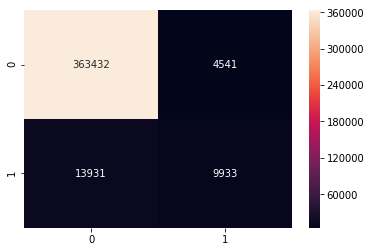

In [14]:
# plot_confusion_matrix(cm)  
sns.heatmap(cm, annot=True, fmt="d")
plt.show()


In [15]:
clf = LogisticRegression(C=0.1, penalty='l2');
clf.fit(X_train_bow, y_train);
w = clf.coef_
print(w.shape)
print(np.count_nonzero(w))

(1, 148584)
148584


In [16]:
clf = LogisticRegression(C=0.1, penalty='l1');
clf.fit(X_train_bow, y_train);
w=clf.coef_
print(w.shape)
print(np.count_nonzero(w))

(1, 148584)
2102


In [17]:
## Pertubation Test
# from scipy.sparse import csr_matrix
print(np.count_nonzero(w))
e=0.1
# X_train_bow_dash=X_train_bow.data+=0.001
# X_train_bow_pert=csr_matrix(X_test_bow, dtype=np.float64)
# X_train_bow_dash=X_test_bow_pert[np.nonzero(X_train_bow_pert)+0.01]
# # X_train_bow_dash=X_test_bow.todense()
type(X_train_bow)

2102


scipy.sparse.csr.csr_matrix

In [18]:
X_train_bow.shape, y_train.shape

((914285, 148584), (914285,))

In [19]:
clf=LogisticRegression(penalty='l2')
clf.fit(X_train_bow, y_train)
pred=clf.predict_proba(X_test_bow)[:, 1]
w_dash=clf.coef_
print(clf.score(X_train_bow, y_train))
print(clf.score(X_test_bow, y_test))

0.9578030920336656
0.9529268547891088


In [20]:
w_dash_0=np.percentile(w_dash,0)
w_dash_25=np.percentile(w_dash,25)
w_dash_50=np.percentile(w_dash,50)
w_dash_75=np.percentile(w_dash,75)
print(w_dash_0, w_dash_25, w_dash_50, w_dash_75)
print('-'*50)
w_0=np.percentile(w,0)
w_25=np.percentile(w,25)
w_50=np.percentile(w,50)
w_75=np.percentile(w,75)
print(w_0, w_25, w_50, w_75)

-2.078679612836076 -0.05343898823247875 -0.015364568968319166 -0.0036152193579692205
--------------------------------------------------
-1.2667807759907106 0.0 0.0 0.0


In [21]:
print('percentage change in 0th percentile : ', (abs(w_0-w_dash_0)/w_0)*100)
print('percentage change in 25th percentile : ', (abs(w_25-w_dash_25)/w_25)*100)
print('percentage change in 50th percentile : ', (abs(w_50-w_dash_50)/w_50)*100)
print('percentage change in 75th percentile : ', (abs(w_75-w_dash_75)/w_75)*100)

percentage change in 0th percentile :  -64.09150282616216
percentage change in 25th percentile :  inf
percentage change in 50th percentile :  inf
percentage change in 75th percentile :  inf


In [23]:
bow_features=bow.get_feature_names()
x = pd.DataFrame(w, columns=bow_features).T
x.shape

(148584, 1)

In [24]:
print('top 10 features for  class 1: \n', x[0].sort_values(ascending=False)[0:10])

top 10 features for  class 1: 
 castrate       5.012732
castrated      4.862452
castration     4.662542
fuck           3.064295
idiots         3.020892
homosexuals    2.939720
incest         2.906974
liberals       2.892300
feminists      2.862977
blacks         2.837439
Name: 0, dtype: float64


In [25]:
print('top 10 features for  class 0: \n', x[0].sort_values(ascending=True)[:10])

top 10 features for  class 0: 
 tips          -1.266781
differences   -1.162894
difference    -1.130377
engineering   -1.062050
study         -0.953157
best          -0.951191
marks         -0.918369
data          -0.913346
differ        -0.894785
affect        -0.892310
Name: 0, dtype: float64


### Decision Trees

In [26]:


depth=[2,3,4,5,6,7,8,9,10]
sample_split=[2,3,4,5,6,7,8,9]
parameters=dict(max_depth=depth,min_samples_split=sample_split)
clf=RandomizedSearchCV(tree.DecisionTreeClassifier(),parameters, scoring='roc_auc', refit=True, cv=3)

clf.fit(X_train_bow, y_train)
cv_error=clf.cv_results_['mean_test_score']
train_error=clf.cv_results_['mean_train_score']
pred=clf.predict(X_train_bow)
score=roc_auc_score(y_train, pred)
split=clf.best_params_['min_samples_split']
depth=clf.best_params_['max_depth']

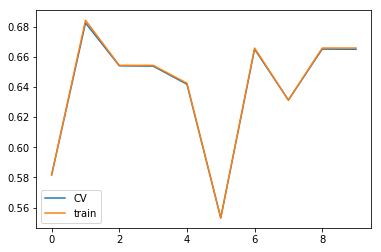

In [27]:
plt.plot(cv_error, label='CV')
plt.plot(train_error, label='train')
plt.legend()
plt.show()

Best value of max_depth:  9
Best value of min_samples_split:  9
ROC SCORE ON BEST HYPER-PARAMETERS:  0.5805666680667192


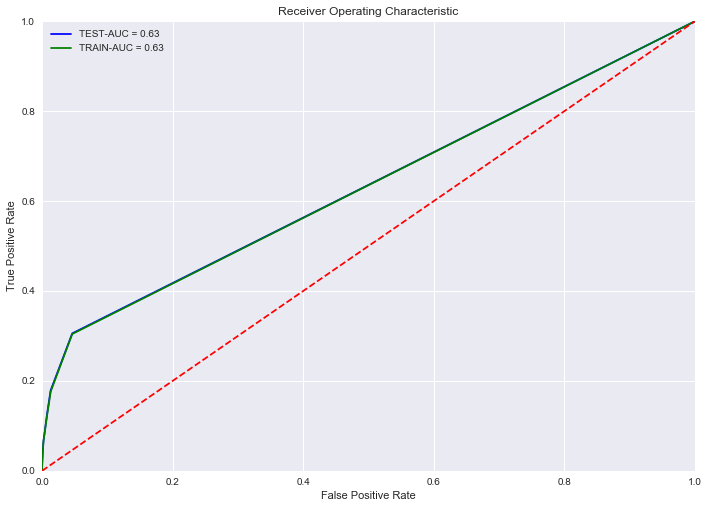

In [33]:
print('Best value of max_depth: ', depth)
print('Best value of min_samples_split: ', split)
model=tree.DecisionTreeClassifier(max_depth=4, min_samples_split=split)
model.fit(X_train_bow, y_train)

w=model.feature_importances_
pred1=model.predict_proba(X_test_bow)[:,1]
pred2=model.predict_proba(X_train_bow)[:,1]
score1=roc_auc_score(y_test, pred1)
score2=roc_auc_score(y_train, pred2)
cm = confusion_matrix(y_test, pred1.round())


print('ROC SCORE ON BEST HYPER-PARAMETERS: ', score)
fpr1, tpr1, threshold = roc_curve(y_test, pred1)
fpr2, tpr2, threshold = roc_curve(y_train, pred2)
roc_auc1 = auc(fpr1, tpr1)
roc_auc2 = auc(fpr2, tpr2)
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'b', label='TEST-AUC = %0.2f' % score1)
plt.plot(fpr2, tpr2, 'g', label = 'TRAIN-AUC = %0.2f' % score2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

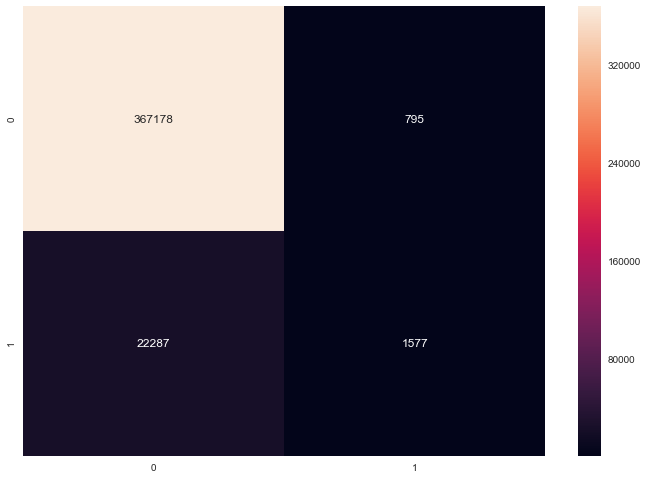

In [34]:
# plot_confusion_matrix(cm)  
sns.heatmap(cm, annot=True, fmt="d")
plt.show()


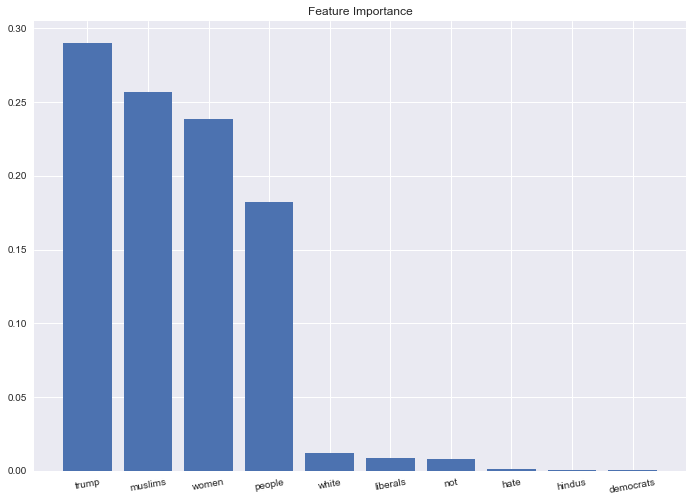

In [35]:
# print('top 10 features for -ve class: \n', df[1].sort_values(ascending=False)[:10])
bow_features=bow.get_feature_names()
d = dict(zip(bow_features, w))
# total=len(d.values())
# zeros=np.count_nonzero(w)
# https://github.com/cyanamous/Amazon-Food-Reviews-Analysis-and-Modelling/blob/master/6%20Amazon%20Food%20Reviews%20-%20Decision%20Trees.ipynb
# Sort feature importances in descending order
indices = np.argsort(w)[::-1][:10]

# Rearrange feature names so they match the sorted feature importances
# names = uni_gram.get_feature_names()

sns.set(rc={'figure.figsize':(11.7,8.27)})

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(10), w[indices])

# Add feature names as x-axis labels
names = np.array(bow_features)
plt.xticks(range(10), names[indices], rotation=10)

# Show plot
plt.show()
# uni_gram.get_feature_names()

### TFIDF

In [12]:
# X=preprocessed_reviews[:]
# y=['Score'][:]
# X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.30, random_state=42)
# # bow = CountVectorizer()
tfidf = TfidfVectorizer()
X_train_tfidf=tfidf.fit_transform(X_train)
X_test_tfidf=tfidf.transform(X_test)
print(X_train_tfidf.shape, y_train.shape)


(914285, 148584) (914285,)


## Logistic Regression

best estimator:  LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Train Score:  0.9547126308201432
Test Score:  0.9472298502331761


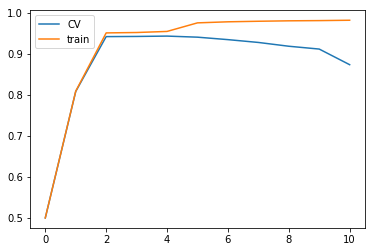

In [13]:
parametersx=[{'C': [10**-4, 10**-2,0.75, 0.81, 1, 5, 10, 20, 50, 10**2, 10**4]}]
clf = GridSearchCV(LogisticRegression(penalty='l1'), parametersx, cv=4, scoring='roc_auc')
# clf.fit(X_train_bow, y_train)
# cv_error=clf.cv_results_['mean_test_score']
# train_error=clf.cv_results_['mean_train_score']
# pred=clf.predict(X_train_bow)
# score=roc_auc_score(y_train, pred)
# c_value=clf.best_params_['C']
# # depth=clf.best_params_['max_depth']
# print("best estimator: ", clf.best_estimator_)
# print("Train Score: ", clf.score(X_train_bow, y_train))
# print("Test Score: ", clf.score(X_test_bow, y_test))

# parametersx=[{'C': [10**-4, 10**-2,0.75, 0.81, 1, 5, 10, 20, 50, 10**2, 10**4]}]
# clf = RandomizedSearchCV(LogisticRegression(penalty='l1'), parametersx, cv=4, scoring='roc_auc' )
clf.fit(X_train_tfidf, y_train)
cv_error=clf.cv_results_['mean_test_score']
train_error=clf.cv_results_['mean_train_score']
pred=clf.predict(X_train_tfidf)
score=roc_auc_score(y_train, pred)
c_value=clf.best_params_['C']
# depth=clf.best_params_['max_depth']
print("best estimator: ", clf.best_estimator_)
print("Train Score: ", clf.score(X_train_tfidf, y_train))
print("Test Score: ", clf.score(X_test_tfidf, y_test))

plt.plot(cv_error, label='CV')
plt.plot(train_error, label='train')
plt.legend()
plt.show()

The best score for AUC is equal to:  0.9447461206094498
The best score for AUC is equal to:  0.9600867920188271
ROC SCORE ON BEST HYPER-PARAMETERS:  0.704629055786981


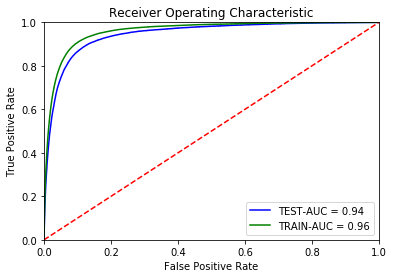

In [14]:
lr = LogisticRegression(C=c_value, penalty='l1')
lr.fit(X_train_bow, y_train)
pred1=lr.predict_proba(X_test_bow)[:,1]
pred2=lr.predict_proba(X_train_bow)[:,1]


print('The best score for AUC is equal to: ', roc_auc_score(y_test, pred1))
print('The best score for AUC is equal to: ', roc_auc_score(y_train, pred2))

score1=roc_auc_score(y_test, pred1)
score2=roc_auc_score(y_train, pred2)
cm = confusion_matrix(y_test, pred1.round())


print('ROC SCORE ON BEST HYPER-PARAMETERS: ', score)
fpr1, tpr1, threshold = roc_curve(y_test, pred1)
fpr2, tpr2, threshold = roc_curve(y_train, pred2)
roc_auc1 = auc(fpr1, tpr1)
roc_auc2 = auc(fpr2, tpr2)
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'b', label='TEST-AUC = %0.2f' % score1)
plt.plot(fpr2, tpr2, 'g', label = 'TRAIN-AUC = %0.2f' % score2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()


In [20]:
w=lr.coef_
tfidf_features=tfidf.get_feature_names()

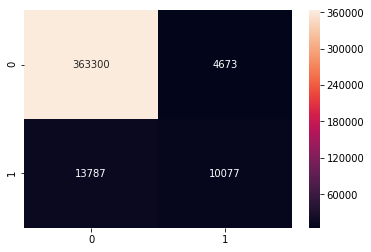

In [15]:
# plot_confusion_matrix(cm)  
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

In [22]:
x = pd.DataFrame(w, columns=tfidf_features).T
print("the shape of this df: ", x.shape)
print('-'*80)
print('top 10 features for  class 1: \n', x[0].sort_values(ascending=False)[0:10])
print('-'*80)
print('top 10 features for  class 0: \n', x[0].sort_values(ascending=True)[:10])

the shape of this df:  (148584, 1)
--------------------------------------------------------------------------------
top 10 features for  class 1: 
 castrate      5.902251
castration    5.775125
auvela        5.555473
scumbags      5.522431
castrated     5.375153
rejuvalex     5.243424
twat          4.979462
horlaxen      4.932896
cusion        4.852989
alabamian     4.829164
Name: 0, dtype: float64
--------------------------------------------------------------------------------
top 10 features for  class 0: 
 mocks       -4.682370
bodily      -4.207780
donot       -4.140826
successes   -4.098183
pollsters   -4.069564
weaponry    -3.944976
revolver    -3.879026
adipose     -3.516568
saif        -3.472976
pcs         -3.396701
Name: 0, dtype: float64


### Decision Trees

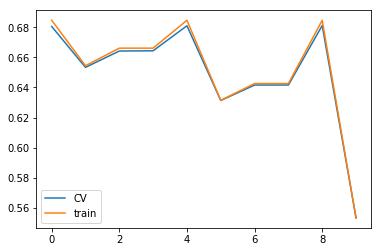

In [23]:
depth=[2,3,4,5,6,7,8,9,10]
sample_split=[2,3,4,5,6,7,8,9]
parameters=dict(max_depth=depth,min_samples_split=sample_split)
clf=RandomizedSearchCV(tree.DecisionTreeClassifier(),parameters, scoring='roc_auc', refit=True, cv=3)

clf.fit(X_train_tfidf, y_train)
cv_error=clf.cv_results_['mean_test_score']
train_error=clf.cv_results_['mean_train_score']
pred=clf.predict(X_train_tfidf)
score=roc_auc_score(y_train, pred)
split=clf.best_params_['min_samples_split']
depth=clf.best_params_['max_depth']

plt.plot(cv_error, label='CV')
plt.plot(train_error, label='train')
plt.legend()
plt.show()

Best value of max_depth:  9
Best value of min_samples_split:  9
ROC SCORE ON BEST HYPER-PARAMETERS:  0.5808462465566813


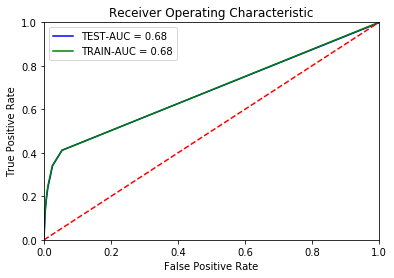

In [24]:
print('Best value of max_depth: ', depth)
print('Best value of min_samples_split: ', split)
model=tree.DecisionTreeClassifier(max_depth=depth, min_samples_split=split)
model.fit(X_train_tfidf, y_train)

w=model.feature_importances_
pred1=model.predict_proba(X_test_tfidf)[:,1]
pred2=model.predict_proba(X_train_tfidf)[:,1]
score1=roc_auc_score(y_test, pred1)
score2=roc_auc_score(y_train, pred2)
cm = confusion_matrix(y_test, pred1.round())


print('ROC SCORE ON BEST HYPER-PARAMETERS: ', score)
fpr1, tpr1, threshold = roc_curve(y_test, pred1)
fpr2, tpr2, threshold = roc_curve(y_train, pred2)
roc_auc1 = auc(fpr1, tpr1)
roc_auc2 = auc(fpr2, tpr2)
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'b', label='TEST-AUC = %0.2f' % score1)
plt.plot(fpr2, tpr2, 'g', label = 'TRAIN-AUC = %0.2f' % score2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

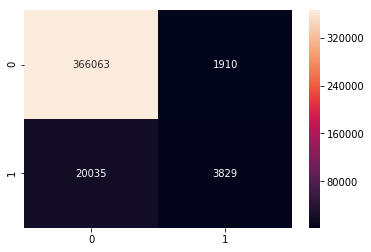

In [25]:
sns.heatmap(cm, annot=True, fmt="d")
plt.show()


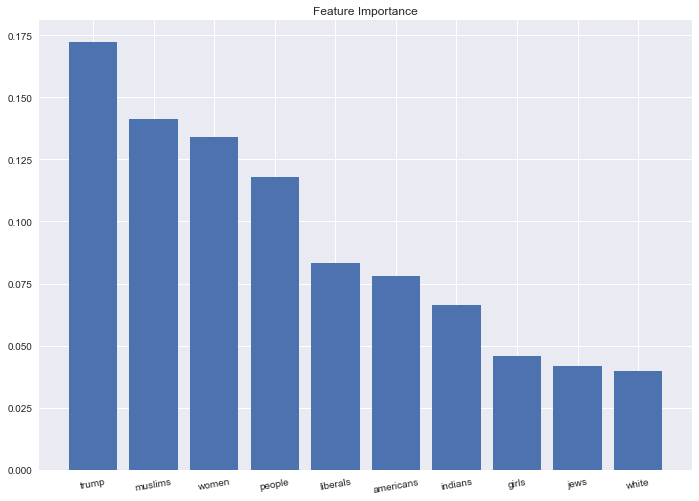

In [26]:
tfidf_features=tfidf.get_feature_names()
d = dict(zip(tfidf_features, w))
# total=len(d.values())
# zeros=np.count_nonzero(w)
# https://github.com/cyanamous/Amazon-Food-Reviews-Analysis-and-Modelling/blob/master/6%20Amazon%20Food%20Reviews%20-%20Decision%20Trees.ipynb
# Sort feature importances in descending order
indices = np.argsort(w)[::-1][:10]

# Rearrange feature names so they match the sorted feature importances
# names = uni_gram.get_feature_names()

sns.set(rc={'figure.figsize':(11.7,8.27)})

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(10), w[indices])

# Add feature names as x-axis labels
names = np.array(tfidf_features)
plt.xticks(range(10), names[indices], rotation=10)

# Show plot
plt.show()
# uni_gram.get_feature_names()

### Word2Vec

In [10]:
from gensim.models import Word2Vec
import gensim


list_sent=[]
for sent in preprocessed_reviews:
    list_sent.append(sent.split())
X=preprocessed_reviews[:]
y=df['target'][:]
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.30, random_state=42)

w2v_model=gensim.models.Word2Vec(X_train,min_count=5, size=50)
w2v_words = list(w2v_model.wv.vocab)

# Then vectorize your train model as
sent_vectors_train = [];
for sent in tqdm(X_train):
    sent_vec = np.zeros(50)
    cnt_words =0;
    for word in sent:
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors_train.append(sent_vec)

    
sent_vectors_test = [];
for sent in tqdm(X_test):
    sent_vec = np.zeros(50)
    cnt_words =0;
    for word in sent: #
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors_test.append(sent_vec)

100%|████████████████████████████████████████████████████████████████████████| 391837/391837 [02:01<00:00, 3211.98it/s]


### Logistic Regression

In [ ]:
parametersx=[{'C': [10**-4, 10**-2,0.75, 0.81, 1, 5, 10, 20, 50, 10**2,10**3, 10**4]}]
clf = GridSearchCV(LogisticRegression(penalty='l1', class_weight='balanced'), parametersx, cv=4, scoring='roc_auc')

clf.fit(sent_vectors_train, y_train)
cv_error=clf.cv_results_['mean_test_score']
train_error=clf.cv_results_['mean_train_score']
pred=clf.predict(sent_vectors_train)
score=roc_auc_score(y_train, pred)
c_value=clf.best_params_['C']
# depth=clf.best_params_['max_depth']
print("best estimator: ", clf.best_estimator_)
print("Train Score: ", clf.score(sent_vectors_train, y_train))
print("Test Score: ", clf.score(sent_vectors_test, y_test))

plt.plot(cv_error, label='CV')
plt.plot(train_error, label='train')
plt.legend()
plt.show()

In [ ]:
lr_w2v = LogisticRegression(C=c_value, penalty='l1', class_weight='balanced')
lr_w2v.fit(sent_vectors_train, y_train)
pred1=lr_w2v.predict_proba(sent_vectors_test)[:,1]
pred2=lr_w2v.predict_proba(sent_vectors_train)[:,1]


print('The best score for AUC is equal to: ', roc_auc_score(y_test, pred1))
print('The best score for AUC is equal to: ', roc_auc_score(y_train, pred2))

score1=roc_auc_score(y_test, pred1)
score2=roc_auc_score(y_train, pred2)
cm = confusion_matrix(y_test, pred1.round())


print('ROC SCORE ON BEST HYPER-PARAMETERS: ', score)
fpr1, tpr1, threshold = roc_curve(y_test, pred1)
fpr2, tpr2, threshold = roc_curve(y_train, pred2)
roc_auc1 = auc(fpr1, tpr1)
roc_auc2 = auc(fpr2, tpr2)
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'b', label='TEST-AUC = %0.2f' % score1)
plt.plot(fpr2, tpr2, 'g', label = 'TRAIN-AUC = %0.2f' % score2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()


In [ ]:
sns.heatmap(cm, annot=True, fmt="d")
plt.show()


In [ ]:
sent_vectors_train[0]

### DT

In [ ]:
depth=[2,3,4,5,6,7,8,9,10]
sample_split=[2,3,4,5,6,7,8,9]
parameters=dict(max_depth=depth,min_samples_split=sample_split)
clf=RandomizedSearchCV(tree.DecisionTreeClassifier(class_weight='balanced'),parameters, scoring='roc_auc', refit=True, cv=3)

clf.fit(sent_vectors_train, y_train)
cv_error=clf.cv_results_['mean_test_score']
train_error=clf.cv_results_['mean_train_score']
pred=clf.predict(sent_vectors_train)
score=roc_auc_score(y_train, pred)
split=clf.best_params_['min_samples_split']
depth=clf.best_params_['max_depth']

plt.plot(cv_error, label='CV')
plt.plot(train_error, label='train')
plt.legend()
plt.show()

In [ ]:
print('Best value of max_depth: ', depth)
print('Best value of min_samples_split: ', split)
dt_w2v=tree.DecisionTreeClassifier(max_depth=depth, min_samples_split=split, class_weight='balanced')
dt_w2v.fit(sent_vectors_train, y_train)

w=dt_w2v.feature_importances_
pred1=dt_w2v.predict(sent_vectors_test)
pred2=dt_w2v.predict(sent_vectors_train)
score1=roc_auc_score(y_test, pred1)
score2=roc_auc_score(y_train, pred2)
cm = confusion_matrix(y_test, pred1.round())


print('ROC SCORE ON BEST HYPER-PARAMETERS: ', score)
fpr1, tpr1, threshold = roc_curve(y_test, pred1)
fpr2, tpr2, threshold = roc_curve(y_train, pred2)
roc_auc1 = auc(fpr1, tpr1)
roc_auc2 = auc(fpr2, tpr2)
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'b', label='TEST-AUC = %0.2f' % score1)
plt.plot(fpr2, tpr2, 'g', label = 'TRAIN-AUC = %0.2f' % score2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

In [ ]:
sns.heatmap(cm, annot=True, fmt="d")
plt.show()


### Run below cells at your own risk, Can take upto 5 days

In [49]:
list_sent=[]
for sent in preprocessed_reviews:
    list_sent.append(sent.split())
# X=list_sent[:]
# y=final['Score'][:]
# X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.30, random_state=42)

X=preprocessed_reviews[:]
y=df['target'][:]
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.30, random_state=42)


w2v_model=gensim.models.Word2Vec(X_train,min_count=5, size=50)
w2v_words = list(w2v_model.wv.vocab)
# model = TfidfVectorizer()
# tf_idf_matrix = model.fit_transform(X_train)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf.get_feature_names(), list(tfidf.idf_)))
# TF-IDF weighted Word2Vec
# tfidf_features = model.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors_train = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(X_train):
    # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words and word in tfidf_features:
            vec = w2v_model.wv[word]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors_train.append(sent_vec)
    row+=1

    
dictionary = dict(zip(tfidf.get_feature_names(), list(tfidf.idf_)))


tfidf_sent_vectors_test = []; 

row=0;
for sent in tqdm(X_test): 
    sent_vec = np.zeros(50) 
    weight_sum =0; 
    for word in sent: 
        if word in w2v_words and word in tfidf_features:
            vec = w2v_model.wv[word]
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors_test.append(sent_vec)
    row += 1

  0%|                                                                         | 585/914285 [04:04<133:53:24,  1.90it/s]

KeyboardInterrupt: 

### Logistic Regression

In [ ]:
parametersx=[{'C': [10**-4, 10**-2,0.75, 0.81, 1, 5, 10, 20, 50, 10**2, 10**4]}]
clf = GridSearchCV(LogisticRegression(penalty='l1', class_weight='balanced'), parametersx, cv=4, scoring='roc_auc')

clf.fit(tfidf_sent_vectors_train, y_train)
cv_error=clf.cv_results_['mean_test_score']
train_error=clf.cv_results_['mean_train_score']
pred=clf.predict(tfidf_sent_vectors_train)
score=roc_auc_score(y_train, pred)
c_value=clf.best_params_['C']
# depth=clf.best_params_['max_depth']
print("best estimator: ", clf.best_estimator_)
print("Train Score: ", clf.score(tfidf_sent_vectors_train, y_train))
print("Test Score: ", clf.score(tfidf_sent_vectors_test, y_test))

plt.plot(cv_error, label='CV')
plt.plot(train_error, label='train')
plt.legend()
plt.show()

In [ ]:
lr_tfidf_w2v = LogisticRegression(C=c_value, penalty='l1', class_weight='balanced')
lr_tfidf_w2v.fit(tfidf_sent_vectors_train, y_train)
pred1=lr_tfidf_w2v.predict(tfidf_sent_vectors_test)
pred2=lr_tfidf_w2v.predict(tfidf_sent_vectors_train)


print('The best score for AUC is equal to: ', roc_auc_score(y_test, pred1))
print('The best score for AUC is equal to: ', roc_auc_score(y_train, pred2))

score1=roc_auc_score(y_test, pred1)
score2=roc_auc_score(y_train, pred2)
cm = confusion_matrix(y_test, pred1.round())


print('ROC SCORE ON BEST HYPER-PARAMETERS: ', score)
fpr1, tpr1, threshold = roc_curve(y_test, pred1)
fpr2, tpr2, threshold = roc_curve(y_train, pred2)
roc_auc1 = auc(fpr1, tpr1)
roc_auc2 = auc(fpr2, tpr2)
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'b', label='TEST-AUC = %0.2f' % score1)
plt.plot(fpr2, tpr2, 'g', label = 'TRAIN-AUC = %0.2f' % score2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()


In [ ]:
sns.heatmap(cm, annot=True, fmt="d")
plt.show()


### Decision Trees

In [ ]:
depth=[2,3,4,5,6,7,8,9]
sample_split=[2,3,4,5,6,7,8,9]
parameters=dict(max_depth=depth,min_samples_split=sample_split)
clf=RandomizedSearchCV(tree.DecisionTreeClassifier(class_weight='balanced'),parameters, scoring='roc_auc', refit=True, cv=3)

clf.fit(tfidf_sent_vectors_train, y_train)
cv_error=clf.cv_results_['mean_test_score']
train_error=clf.cv_results_['mean_train_score']
pred=clf.predict(tfidf_sent_vectors_train)
score=roc_auc_score(y_train, pred)
split=clf.best_params_['min_samples_split']
depth=clf.best_params_['max_depth']

plt.plot(cv_error, label='CV')
plt.plot(train_error, label='train')
plt.legend()
plt.show()

In [ ]:
print('Best value of max_depth: ', depth)
print('Best value of min_samples_split: ', split)
dt_tfidf_w2v=tree.DecisionTreeClassifier(max_depth=depth, min_samples_split=split, class_weight='balanced')
dt_tfidf_w2v.fit(tfidf_sent_vectors_train, y_train)

w=dt_tfidf_w2v.feature_importances_
pred1=dt_tfidf_w2v.predict(tfidf_sent_vectors_test)
pred2=dt_tfidf_w2v.predict(tfidf_sent_vectors_train)
score1=roc_auc_score(y_test, pred1)
score2=roc_auc_score(y_train, pred2)
cm = confusion_matrix(y_test, pred1.round())


print('ROC SCORE ON BEST HYPER-PARAMETERS: ', score)
fpr1, tpr1, threshold = roc_curve(y_test, pred1)
fpr2, tpr2, threshold = roc_curve(y_train, pred2)
roc_auc1 = auc(fpr1, tpr1)
roc_auc2 = auc(fpr2, tpr2)
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'b', label='TEST-AUC = %0.2f' % score1)
plt.plot(fpr2, tpr2, 'g', label = 'TRAIN-AUC = %0.2f' % score2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

In [ ]:
sns.heatmap(cm, annot=True, fmt="d")
plt.show()
